In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [330]:
train_data = pd.read_csv("aug_train.csv")
test_data = pd.read_csv("aug_test.csv")

In [331]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [332]:
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [333]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [334]:
train_data.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [335]:
drop_cols = []
drop_cols.append("enrollee_id")

In [336]:
train_data['target'] = train_data['target'].astype(int)
train_data['target'].value_counts()

0    14381
1     4777
Name: target, dtype: int64

In [337]:
train_data.groupby("city").agg(["mean", "count"])["target"].sort_values("count", ascending=False)

,mean,count
city,,
city_103,0.213088,4355
city_21,0.591044,2702
city_16,0.116765,1533
city_114,0.099551,1336
city_160,0.235503,845
...,...,...
city_111,0.000000,3
city_129,0.000000,3
city_121,0.333333,3


In [338]:
drop_cols.append("city")

In [339]:
drop_cols

['enrollee_id', 'city']

In [340]:
gender_mapping = {"Female": 0, "Male": 1, "Other": 2}

In [341]:
gender_mapping

{'Female': 0, 'Male': 1, 'Other': 2}

In [342]:
train_data["relevent_experience"].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

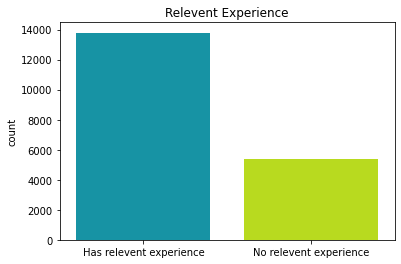

In [343]:
sns.countplot(train_data["relevent_experience"], palette="nipy_spectral")
plt.title("Relevent Experience")
plt.xlabel("");

In [344]:
relevent_experience_mapping = {"No relevent experience": 0, "Has relevent experience": 1}

In [345]:
relevent_experience_mapping

{'No relevent experience': 0, 'Has relevent experience': 1}

In [346]:
train_data.groupby("enrolled_university").agg(["mean", "count"])["target"]

,mean,count
enrolled_university,,
Full time course,0.380889,3757
Part time course,0.252087,1198
no_enrollment,0.211406,13817


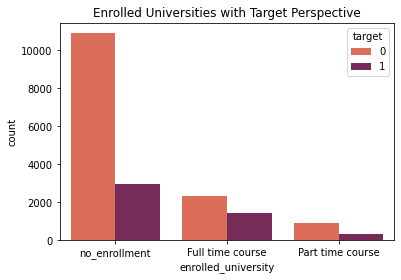

In [347]:
sns.countplot(x="enrolled_university", hue="target",
              palette="rocket_r", data=train_data)
plt.title("Enrolled Universities with Target Perspective");

In [348]:
enrollment_mapping = {"no_enrollment": 0, "Part time course": 1, "Full time course": 2}

In [349]:
enrollment_mapping

{'no_enrollment': 0, 'Part time course': 1, 'Full time course': 2}

In [350]:
train_data.groupby("education_level").agg(["mean", "count"])["target"]


,mean,count
education_level,,
Graduate,0.279790,11598
High School,0.195340,2017
Masters,0.214400,4361
Phd,0.140097,414
Primary School,0.133117,308


In [351]:
education_mapping = {"Phd": 0, "Masters": 1, "Graduate": 2,
                     "High School": 3, "Primary School": 4}

In [352]:
education_mapping

{'Phd': 0, 'Masters': 1, 'Graduate': 2, 'High School': 3, 'Primary School': 4}

In [353]:
train_data.groupby("major_discipline").agg(["mean", "count"])["target"]

,mean,count
major_discipline,,
Arts,0.209486,253
Business Degree,0.262997,327
Humanities,0.210762,669
No Major,0.246637,223
Other,0.267717,381
STEM,0.261593,14492


In [354]:
discipline_mapping = {"Business Degree": 0, "STEM": 1,
                      "Humanities": 2, "Arts": 3,
                      "Other": 4, "No Major": 5}

In [355]:
discipline_mapping

{'Business Degree': 0,
 'STEM': 1,
 'Humanities': 2,
 'Arts': 3,
 'Other': 4,
 'No Major': 5}

In [356]:
train_data.groupby("experience").agg(["mean", "count"])["target"].sort_values("mean")

,mean,count
experience,,
16,0.141732,508
>20,0.153074,3286
18,0.153571,280
15,0.166181,686
17,0.166667,342
19,0.174342,304
14,0.182594,586
12,0.186235,494
13,0.192982,399


In [357]:
experience_mapping = {"<1": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5,
                      "6": 6, "7": 7, "8": 8, "9": 9, "10": 10, "11": 11,
                      "12": 12, "13": 13, "14": 14, "15": 15, "16": 16,
                      "17": 17, "18": 18, "19": 19, "20": 20, ">20": 21}



In [358]:
experience_mapping

{'<1': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '14': 14,
 '15': 15,
 '16': 16,
 '17': 17,
 '18': 18,
 '19': 19,
 '20': 20,
 '>20': 21}

In [359]:
train_data.groupby("company_size").agg(["mean", "count"])["target"]

,mean,count
company_size,,
10/49,0.233855,1471
100-500,0.161416,2571
1000-4999,0.150602,1328
10000+,0.190688,2019
50-99,0.176776,3083
500-999,0.173318,877
5000-9999,0.181172,563
<10,0.171254,1308


In [360]:
company_size_mapping = {"10000+": 0,
                        "5000-9999": 1,
                        "1000-4999": 2,
                        "500-999": 3,
                        "100-500": 4,
                        "50-99": 5,
                        "10/49": 6,
                        "<10": 7}

In [361]:
company_size_mapping

{'10000+': 0,
 '5000-9999': 1,
 '1000-4999': 2,
 '500-999': 3,
 '100-500': 4,
 '50-99': 5,
 '10/49': 6,
 '<10': 7}

In [362]:
train_data.groupby("company_type").agg(["mean", "count"])["target"].sort_values("mean", ascending=False)

,mean,count
company_type,,
Other,0.239669,121
Early Stage Startup,0.235489,603
Public Sector,0.219895,955
NGO,0.186180,521
Pvt Ltd,0.180809,9817
Funded Startup,0.139860,1001


In [363]:
company_type_mapping = {"Other": 0,
                        "Early Stage Startup": 1,
                        "Public Sector": 2,
                        "NGO": 3,
                        "Pvt Ltd": 4,
                        "Funded Startup": 5}

In [364]:
company_type_mapping

{'Other': 0,
 'Early Stage Startup': 1,
 'Public Sector': 2,
 'NGO': 3,
 'Pvt Ltd': 4,
 'Funded Startup': 5}

In [365]:
train_data.groupby("last_new_job").agg(["mean", "count"])["target"]

,mean,count
last_new_job,,
1,0.264303,8040
2,0.241379,2900
3,0.225586,1024
4,0.221574,1029
>4,0.182371,3290
never,0.301387,2452


In [366]:
last_new_job_mapping = {"never": 0,
                        "1": 1,
                        "2": 2,
                        "3": 3,
                        "4": 4,
                        ">4": 5}

In [367]:
last_new_job_mapping

{'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5}

In [368]:
drop_cols

['enrollee_id', 'city']

In [369]:
train_data.drop(drop_cols, axis=1, inplace=True)

In [370]:
train_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0


In [371]:
# train_data['gender'] = train_data['gender'].map(gender_mapping)
# train_data['gender'].fillna(train_data['gender'].mean(), inplace = True)
# train_data['relevent_experience'] = train_data['relevent_experience'].map(relevent_experience_mapping)
# train_data["enrolled_university"] = train_data["enrolled_university"].map(enrollment_mapping)
# train_data["enrolled_university"].fillna(train_data["enrolled_university"].mean(), inplace=True)
# train_data["education_level"] = train_data["education_level"].map(education_mapping)
# train_data["education_level"].fillna(train_data["education_level"].mean(), inplace=True)
# train_data["major_discipline"] = train_data["major_discipline"].map(discipline_mapping)
# train_data["major_discipline"].fillna(train_data["major_discipline"].mean(), inplace=True)
# train_data["experience"] = train_data["experience"].map(experience_mapping)
# train_data["experience"].fillna(train_data["experience"].mean(), inplace=True)
# train_data["company_size"] = train_data["company_size"].map(company_size_mapping)
# train_data["company_size"].fillna(train_data["company_size"].mean(), inplace=True)
# train_data["company_type"] = train_data["company_type"].map(company_type_mapping)
# train_data["company_type"].fillna(train_data["company_type"].mean(), inplace=True)
# train_data["last_new_job"] = train_data["last_new_job"].map(last_new_job_mapping)
# train_data["last_new_job"].fillna(train_data["last_new_job"].mean(), inplace=True)

In [372]:
cols = list(train_data.columns)
cols.remove('city_development_index')
cols.remove('training_hours')
cols.remove('target')
# print(cols)
maps={'gender':gender_mapping,'relevent_experience':relevent_experience_mapping,
     'enrolled_university':enrollment_mapping,'education_level':education_mapping,
     'major_discipline':discipline_mapping,'experience':experience_mapping,
     'company_size':company_size_mapping,'company_type':company_type_mapping,
     'last_new_job':last_new_job_mapping}
for i in cols:
    train_data[i]=train_data[i].map(maps[i])


In [373]:
train_data.isnull().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [374]:
train_data = train_data.fillna(train_data.mode().iloc[0])

In [453]:
train_data.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [454]:
train_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.0,1,0.0,2.0,1.0,21.0,5.0,4.0,1.0,36,1
1,0.776,1.0,0,0.0,2.0,1.0,15.0,5.0,4.0,5.0,47,0
2,0.624,1.0,0,2.0,2.0,1.0,5.0,5.0,4.0,0.0,83,0
3,0.789,1.0,0,0.0,2.0,0.0,0.0,5.0,4.0,0.0,52,1
4,0.767,1.0,1,0.0,1.0,1.0,21.0,5.0,5.0,4.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1.0,0,0.0,2.0,2.0,14.0,5.0,4.0,1.0,42,1
19154,0.920,1.0,1,0.0,2.0,1.0,14.0,5.0,4.0,4.0,52,1
19155,0.920,1.0,1,0.0,2.0,1.0,21.0,5.0,4.0,4.0,44,0
19156,0.802,1.0,1,0.0,3.0,1.0,0.0,3.0,4.0,2.0,97,0


In [377]:
train_data.corr()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
city_development_index,1.000000,-0.019808,0.059808,-0.165555,-0.032483,0.051228,0.329124,-0.087877,-0.000211,0.191410,0.001920,-0.341665
gender,-0.019808,1.000000,-0.004455,0.022702,0.065250,-0.037166,0.029815,0.015574,0.024798,0.000741,-0.002013,-0.006733
relevent_experience,0.059808,-0.004455,1.000000,-0.372919,-0.228537,-0.005300,0.337552,-0.104001,0.027225,0.247496,0.011566,-0.128430
enrolled_university,-0.165555,0.022702,-0.372919,1.000000,0.169020,-0.056085,-0.334351,0.104338,-0.048010,-0.237087,-0.003943,0.149539
education_level,-0.032483,0.065250,-0.228537,0.169020,1.000000,-0.041430,-0.273169,0.130228,0.065689,-0.195543,0.011375,0.011018
major_discipline,0.051228,-0.037166,-0.005300,-0.056085,-0.041430,1.000000,0.015041,0.021671,-0.015862,0.025213,-0.005262,-0.005748
experience,0.329124,0.029815,0.337552,-0.334351,-0.273169,0.015041,1.000000,-0.130320,0.027592,0.474052,0.001479,-0.174256
company_size,-0.087877,0.015574,-0.104001,0.104338,0.130228,0.021671,-0.130320,1.000000,-0.013197,-0.141026,0.010114,0.080316
company_type,-0.000211,0.024798,0.027225,-0.048010,0.065689,-0.015862,0.027592,-0.013197,1.000000,-0.012604,-0.002798,0.001422
last_new_job,0.191410,0.000741,0.247496,-0.237087,-0.195543,0.025213,0.474052,-0.141026,-0.012604,1.000000,-0.004949,-0.084607


In [378]:
train_data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.0,1,0.0,2.0,1.0,21.0,5.0,4.0,1.0,36,1
1,0.776,1.0,0,0.0,2.0,1.0,15.0,5.0,4.0,5.0,47,0
2,0.624,1.0,0,2.0,2.0,1.0,5.0,5.0,4.0,0.0,83,0
3,0.789,1.0,0,0.0,2.0,0.0,0.0,5.0,4.0,0.0,52,1
4,0.767,1.0,1,0.0,1.0,1.0,21.0,5.0,5.0,4.0,8,0


In [455]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_data.drop("target",axis=1)
Y = train_data["target"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)

In [456]:
X_train_sc

array([[-1.65490179,  0.20555061, -1.60027298, ...,  0.24482049,
        -0.58413601, -0.21998827],
       [-1.65490179,  0.20555061,  0.62489339, ...,  0.24482049,
        -0.58413601,  0.45162661],
       [ 0.66117943,  0.20555061,  0.62489339, ...,  0.24482049,
        -0.58413601, -0.48863423],
       ...,
       [ 0.74216129,  3.96034039,  0.62489339, ...,  0.24482049,
        -1.18634699, -0.28714976],
       [-1.65490179,  0.20555061, -1.60027298, ...,  0.24482049,
        -0.58413601,  0.16619028],
       [ 0.66117943,  0.20555061,  0.62489339, ...,  0.24482049,
        -0.58413601, -1.04271651]])

In [512]:
from sklearn.tree import DecisionTreeClassifier
# min_samples_leaf=3,max_leaf_nodes=3
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=5)
classifier.fit(X_train_sc, Y_train)
Y_pred = classifier.predict(X_test_sc)

In [513]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.7834029227557411

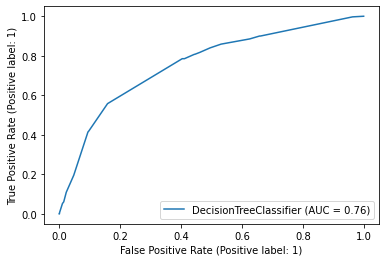

In [514]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test_sc, Y_test)

In [505]:
len(Y_pred)

3832

In [506]:
len(Y_test)

3832

In [507]:
features = list(X_train.columns)
target_=['target']

In [508]:
features

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours']

In [509]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= -1.65
|   |--- feature_7 <= 0.72
|   |   |--- class: 1
|   |--- feature_7 >  0.72
|   |   |--- class: 1
|--- feature_0 >  -1.65
|   |--- feature_7 <= 0.20
|   |   |--- class: 0
|   |--- feature_7 >  0.20
|   |   |--- class: 0



[Text(0.5, 0.8333333333333334, 'X[0] <= -1.651\ngini = 0.375\nsamples = 15326\nvalue = [11499, 3827]'),
 Text(0.25, 0.5, 'X[7] <= 0.72\ngini = 0.485\nsamples = 2761\nvalue = [1139, 1622]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.489\nsamples = 2318\nvalue = [984, 1334]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.455\nsamples = 443\nvalue = [155, 288]'),
 Text(0.75, 0.5, 'X[7] <= 0.197\ngini = 0.289\nsamples = 12565\nvalue = [10360, 2205]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.17\nsamples = 4955\nvalue = [4490, 465]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.353\nsamples = 7610\nvalue = [5870, 1740]')]

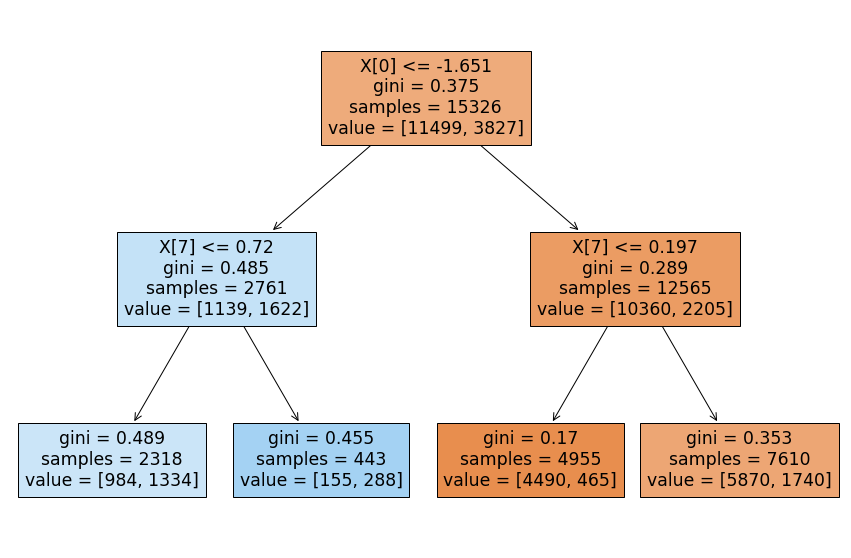

In [510]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)